### Import of data

In [1]:
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

### Data we going to use in csv

In [2]:
features = ["hktv_ad_id", "order_value", "primary_category_name_en"]

### Import csv, from 2021 November to 2022 November, each months 1st day

In [3]:
csv_1 = pd.read_csv('csv/Public_Transaction_2021-11-01.csv', usecols=features)
csv_2 = pd.read_csv('csv/Public_Transaction_2021-12-01.csv', usecols=features)
csv_3 = pd.read_csv('csv/Public_Transaction_2022-01-01.csv', usecols=features)
csv_4 = pd.read_csv('csv/Public_Transaction_2022-02-01.csv', usecols=features)
csv_5 = pd.read_csv('csv/Public_Transaction_2022-03-01.csv', usecols=features)
csv_6 = pd.read_csv('csv/Public_Transaction_2022-04-01.csv', usecols=features)
csv_7 = pd.read_csv('csv/Public_Transaction_2022-05-01.csv', usecols=features)
csv_8 = pd.read_csv('csv/Public_Transaction_2022-06-01.csv', usecols=features)
csv_9 = pd.read_csv('csv/Public_Transaction_2022-07-01.csv', usecols=features)
csv_10 = pd.read_csv('csv/Public_Transaction_2022-08-01.csv', usecols=features)
csv_11 = pd.read_csv('csv/Public_Transaction_2022-09-01.csv', usecols=features)
csv_12 = pd.read_csv('csv/Public_Transaction_2022-10-01.csv', usecols=features)
csv_13 = pd.read_csv('csv/Public_Transaction_2022-11-01.csv', usecols=features)

### Joining all the csv into a large dataframe

In [4]:
df_1 = pd.concat([csv_1,csv_2,csv_3,csv_4,csv_5,csv_6,csv_7,csv_8,csv_9,csv_10,csv_11,csv_12,csv_13], ignore_index=True)

### Number of Data

In [5]:
df_1.shape[0]

3030730

### Read the user's data including gender and age range

In [6]:
f = open("sampleJSON.txt", encoding='utf-8').read()
feature = ["hktv_ad_id", "gender", "age_range"]
t = f.split("\n")
t.pop()
empty = []
for i in t:
    rows = json.loads(i)
    empty.append([rows["hktv_ad_id"], rows["gender"], rows["age_range"]])
df_2 = pd.DataFrame(empty, columns=feature)

### order value : From range (i.e. 5000-6000) to value (5000+6000 /2 = 5500)

In [7]:
#Make grouped data to numerical data

data = []
for i in range(len(df_1['order_value'])):
    num = df_1['order_value'][i].split(' - ')
    data.append((int(num[0])+int(num[1]))/2)

df_1["price"] = data

### same as order value, from age_range ot age

In [8]:
#Make grouped data to numerical data

data = []
for i in range(len(df_2['age_range'])):
    if df_2['age_range'][i] == None or df_2['age_range'][i] == "":
        data.append(np.nan)
        continue
    if df_2['age_range'][i].split('_')[1] == '55plus':
        data.append(60)
    elif df_2['age_range'][i].split('_')[1] == "12":
        data.append(10)
    else:
        num = df_2['age_range'][i].split('_')
        data.append((int(num[1])+int(num[2]))/2)

df_2['age'] = data

### Merging the transaction table and user data table, by the customer id (hktv_ad_id)

In [9]:
df = pd.merge(df_1, df_2, on="hktv_ad_id")
df.drop(labels=["order_value", "age_range"], axis=1, inplace=True)

In [10]:
#dealing with null and none data?

#price -> mean according to?
df['price'].fillna(value = df['price'].mean(), inplace = True)
#age -> mean according to?
df['age'].fillna(value = df['age'].mean(), inplace = True)
#gender = none
df.dropna(inplace=True)

In [11]:
#Check for the missing value again
df.isna().sum()

hktv_ad_id                  0
primary_category_name_en    0
price                       0
gender                      0
age                         0
dtype: int64

In [12]:
#Rename the 'primary_category_name_en' to 'category'
df.rename(columns={'primary_category_name_en':'category', 'hktv_ad_id':'user'}, inplace=True)
#Reorder to let the target value to be the last column
df = df.reindex(columns=["user", "gender", "age", "category", "price"])

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
l1 = LabelEncoder()
cat = ['category', 'gender']
for parameter in cat:
    l1.fit(df[parameter])
    df[parameter] = l1.transform(df[parameter])

In [15]:
# Number of data after merge and concating all csv
df.shape[0]

106446

In [16]:
df['age'] = df['age'].astype('int')
df['price'] = df['price'].astype('int')

In [17]:
df.head()

,user,gender,age,category,price
8,LHXRgMIvLsJIsBZ9EcE6h8jLWkWboqseR1ftfkTPD/U=,0,22,12,324
17,W5UIVAX8xv2iZFRYSjDEOmX3wcpAEQvU+SW8p7hAFO4=,0,30,12,424
18,W5UIVAX8xv2iZFRYSjDEOmX3wcpAEQvU+SW8p7hAFO4=,0,30,12,424
19,W5UIVAX8xv2iZFRYSjDEOmX3wcpAEQvU+SW8p7hAFO4=,0,30,12,24
20,W5UIVAX8xv2iZFRYSjDEOmX3wcpAEQvU+SW8p7hAFO4=,0,30,12,24


# Dimention Reduction JT <hr>

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [19]:
variables = ['category', 'gender', 'age']
x = df.loc[:, variables].values
y = df.loc[:,['price']].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)

In [20]:
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2
0,-1.557824,-0.255189,-0.959979
1,-0.824967,-0.545002,-0.355248
2,-0.824967,-0.545002,-0.355248
3,-0.824967,-0.545002,-0.355248
4,-0.824967,-0.545002,-0.355248


### From Below, we can see that only two parameter cannot even capture 70% of the variance of the data, therefore we won't conduct any dimention reduction here.

In [21]:
explained_variance = pca.explained_variance_ratio_
explained_variance[:2].sum()

0.6859674795833717

In [22]:
x_pca['price']=y
x_pca.columns = ['category', 'gender', 'age', 'price']
x_pca.head()

,category,gender,age,price
0,-1.557824,-0.255189,-0.959979,324
1,-0.824967,-0.545002,-0.355248,424
2,-0.824967,-0.545002,-0.355248,424
3,-0.824967,-0.545002,-0.355248,24
4,-0.824967,-0.545002,-0.355248,24


# Regression Nathalie<hr>

## Thing's to do <br>
<h3><ol>
<li> train test split: Use sklearn library, 80% training 20% test</li>
<li> Model Training: use the best degree aka the best fit line</li>
<li> Performance Testing: Use R2 and RMS From HW 5</li>
</ol></h3>

In [23]:
df.head()

,user,gender,age,category,price
8,LHXRgMIvLsJIsBZ9EcE6h8jLWkWboqseR1ftfkTPD/U=,0,22,12,324
17,W5UIVAX8xv2iZFRYSjDEOmX3wcpAEQvU+SW8p7hAFO4=,0,30,12,424
18,W5UIVAX8xv2iZFRYSjDEOmX3wcpAEQvU+SW8p7hAFO4=,0,30,12,424
19,W5UIVAX8xv2iZFRYSjDEOmX3wcpAEQvU+SW8p7hAFO4=,0,30,12,24
20,W5UIVAX8xv2iZFRYSjDEOmX3wcpAEQvU+SW8p7hAFO4=,0,30,12,24


In [24]:
print(len(df))

106446


For 3 predictors (), the equation includes all the possible combinations of different order polynomials. This is known as Multi-dimensional Polynomial Regression.

1. Import all libraries needed

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import math
import seaborn as sns
from sklearn.metrics import mean_squared_error

2. Split the dataframe into traing set and test set

In [26]:
X = df[['gender', 'age', 'category']]
Y = df['price']

df = df.sample(frac=1).reset_index(drop=True)# shuffle the data

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = .8)
# random_state is a pseudo-random number parameter that allows you to reproduce the same train test split each time you run the code. 

In [27]:
print(X)

        gender  age  category
8            0   22        12
17           0   30        12
18           0   30        12
19           0   30        12
20           0   30        12
...        ...  ...       ...
175569       1   30        13
175570       1   30        13
175571       0   30        13
175572       0   30        13
175573       0   30        13

[106446 rows x 3 columns]


3. Build the Regression Model
   
    3.1. Multiple linear Regression

In [28]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [29]:
# model equation of multiple linear regression
print("Intercept: " ,mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  998.9020068373145
Coefficients:


[(0, -20.43775600018423), (1, -2.6556650572299922), (2, -12.958818078900979)]

In [30]:
# prediction of test set
y_pred_mlr= mlr.predict(x_test)
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [739.82525266 739.82525266 854.11845752 ... 710.61293703 793.84572566
 730.01015689]


In [31]:
# Since it is difficult to plot out a graph with 4 parameter, so I will only plot out the graph comparsion between the actual value and predicted value
# Actual values and the predicted values
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
130357,574,739.825253
75652,1149,739.825253
80962,374,854.118458
159309,424,739.825253
172962,374,802.602692


 Evaluation of regression model

In [32]:
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
print(mse_mlr)

646558.4436562925


# KNN Tree

In [33]:
from sklearn.neighbors import KNeighborsRegressor

In [34]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(x_train, y_train)
train_preds = knn_model.predict(x_test)

In [35]:
mse_knn = mean_squared_error(y_test, train_preds)
print(mse_knn)

1371438.2567454726


# Support Vector Machine

In [36]:
x_train

,gender,age,category
130037,0,50,12
108356,1,30,12
13771,0,30,12
84125,0,35,12
84894,1,60,8
...,...,...,...
33357,1,50,12
74718,0,50,12
69808,0,35,12
71366,1,35,12


In [37]:
from sklearn.svm import SVC

In [38]:
clf = SVC(kernel = "linear")
clf.fit(x_train[:1000], y_train[:1000])
y_pred_svm = clf.predict(x_test)

In [39]:
mse_SVC1 = mean_squared_error(y_test, y_pred_svm)
print(mse_SVC1)

799872.1524189761


In [40]:
clf = SVC(kernel = "poly")
clf.fit(x_train[:1000], y_train[:1000])
y_pred_svm = clf.predict(x_test)

In [41]:
mse_SVC2 = mean_squared_error(y_test, y_pred_svm)
print(mse_SVC2)

798504.02184124


In [42]:
clf = SVC(kernel = "rbf")
clf.fit(x_train[:1000], y_train[:1000])
y_pred_svm = clf.predict(x_test)

In [43]:
mse_SVC3 = mean_squared_error(y_test, y_pred_svm)
print(mse_SVC3)

798504.02184124


In [44]:
clf = SVC(kernel = "sigmoid")
clf.fit(x_train[:1000], y_train[:1000])
y_pred_svm = clf.predict(x_test)

In [45]:
mse_SVC4 = mean_squared_error(y_test, y_pred_svm)
print(mse_SVC4)

812961.8658994833


In [46]:
print(f"linear:{mse_SVC1}, polynomial:{mse_SVC2}, rbf:{mse_SVC3}, signmoid:{mse_SVC4}")

linear:799872.1524189761, polynomial:798504.02184124, rbf:798504.02184124, signmoid:812961.8658994833


# Decision Tree

In [47]:
df.head()

,user,gender,age,category,price
0,oakxQl8DAvlzj71SabVCBmrwDbSVLskUTq81ol0pAzc=,1,22,12,1049
1,tS/rOnpfkl5aIDtrw0/WlYnxrN6be6fH4TLfjTlyyxY=,0,60,12,74
2,pD2jdJSrQQP//XMj7ST467DmPM5gZ2aUK/PYkmfFnz0=,0,50,12,1949
3,JgF1sgDU6gcDfXm0956VcUtl1BGoEHMyibgpCR9Dwns=,0,21,4,624
4,UrW1Hmy6OggjQYkqEFLe4riOwx+s9Y5/WZzuX2dGo7c=,0,39,12,674


In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes = 3)

# Train Decision Tree Classifer
clf2 = clf2.fit(x_train[:1000],y_train[:1000])

#Predict the response for test dataset
y_pred_dt = clf2.predict(x_test)

Evaluation of model

In [50]:
mse_clf2 = mean_squared_error(y_test, y_pred_dt)
print(mse_clf2)

765283.4957726633


In [51]:
# Create Decision Tree classifer object
clf3 = DecisionTreeClassifier(criterion='gini',max_leaf_nodes = 3)

# Train Decision Tree Classifer
clf3 = clf3.fit(x_train[:1000],y_train[:1000])

#Predict the response for test dataset
y_pred_dt = clf3.predict(x_test)

In [52]:
mse_clf3 = mean_squared_error(y_test, y_pred_dt)
print(mse_clf3)

768668.1834194458


Visualization of decision tree

In [53]:
from sklearn import tree

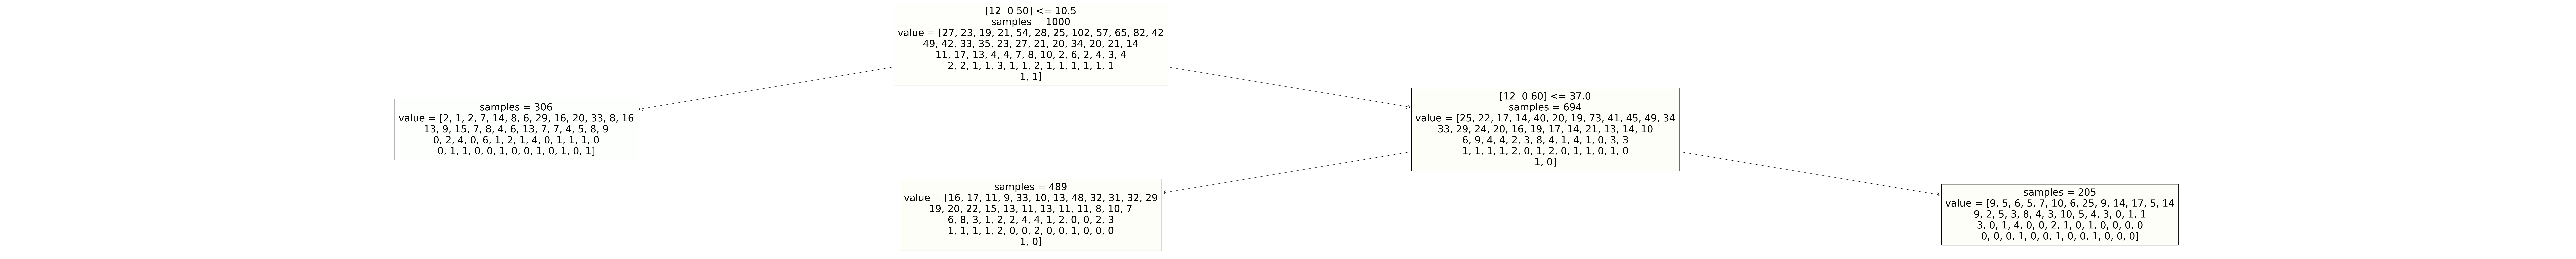

In [54]:
fig = plt.figure(figsize=(200,20))
variables = ['category', 'gender', 'age']
graph = tree.plot_tree(clf2, 
                   feature_names=df.loc[:, variables].values,  
                   class_names=None,
                   filled=True,
                   impurity=False)